<a href="https://colab.research.google.com/github/ph4nt0mgui1d/FinalTask_Forsk/blob/master/App_UI_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     |████████████████████████████████| 7.3 MB 5.4 MB/s 
     |████████████████████████████████| 23.9 MB 14 kB/s 
     |████████████████████████████████| 357 kB 44.8 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=ac5a5fdfff00b16ff50f83b6dbd89366ed928ec546d5cfdde7e56333452c0142
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=db6d83a68c1320f03aeb9f93bd03ffb491f96128e0d3a4f6b3198ac2d9bbb9b9
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=3899e14dc57c11b7f6622ab25a4293d5fa1cd973233e4b32a04cf752aefbc740
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aefd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  from ipykernel import kernelapp as app


Start of your project


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Loading Data......
Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


End of my project


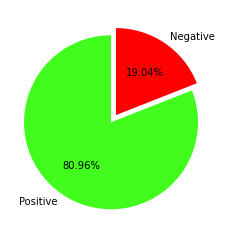

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 20 00:36:21 2021

@author: Aryan Sharma
"""

# Importing libraries
!pip install dash
!pip install dash-bootstrap-components
import pickle
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output , State
import webbrowser
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import os
import numpy as np
from wordcloud import WordCloud, STOPWORDS

# Global variables
project_name = None
app = dash.Dash()

# Functions
def load_model():
    global scrappedReviews
    scrappedReviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Task/scrappedReviews.csv')
    scrappedReviews = scrappedReviews.dropna(subset = ['reviews'])

  
    global pickle_model
    file = open("/content/drive/MyDrive/Colab Notebooks/Final Task/pickle_model.pkl", 'rb') 
    pickle_model = pickle.load(file)

    global vocab
    file = open("/content/drive/MyDrive/Colab Notebooks/Final Task/vocab.pkl", 'rb') 
    vocab = pickle.load(file)
    
    print('Loading Data......')
    temp = []
    for i in scrappedReviews['reviews']:
        temp.append(check_review(i)[0])
    scrappedReviews['sentiment'] = temp
    
    positive = len(scrappedReviews[scrappedReviews['sentiment']==1])
    negative = len(scrappedReviews[scrappedReviews['sentiment']==0])
    
    explode = (0.1,0)  

    langs = ['Positive', 'Negative',]
    students = [positive,negative]
    colors = ['#41fc1c','red']
    plt.pie(students,explode=explode,startangle=90,colors=colors, labels = langs,autopct='%1.2f%%')
    cwd = os.getcwd()
    if 'assets' not in os.listdir(cwd):
        os.makedirs(cwd+'/assets')
    plt.savefig('assets/sentiment.png')
    #wordcloud
    dataset = scrappedReviews['reviews'].to_list()
    str1 = ''
    for i in dataset:
        str1 = str1+i
    str1 = str1.lower()

    stopwords = set(STOPWORDS)
    cloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(str1)
    cloud.to_file("assets/wordCloud.png")
    #drop down
    global chart_dropdown_values
    chart_dropdown_values = {}
    for i in range(400,501):
        chart_dropdown_values[scrappedReviews['reviews'][i]] = scrappedReviews['reviews'][i]
    chart_dropdown_values = [{"label":key, "value":values} for key,values in chart_dropdown_values.items()]
    
def check_review(reviewText):
    transformer = TfidfTransformer()
    loaded_vec = CountVectorizer(decode_error="replace",vocabulary=vocab)
    vectorised_review = transformer.fit_transform(loaded_vec.fit_transform([reviewText]))

    
    return pickle_model.predict(vectorised_review)

def open_browser():
    webbrowser.open_new('http://127.0.0.1:8050/')
    
def create_app_ui():
    main_layout = html.Div(
    [
    html.H1(id='Main_title', children = "Sentiment Analysis with Insights",style={'text-align':'center'}),
    html.Hr(style={'background-color':'black'}),
    html.H2(children = "Pie Chart",style = {'text-align':'center','text-decoration':'underline'}),
    html.P([html.Img(src=app.get_asset_url('sentiment.png'),style={'width':'700px','height':'400px'})],style={'text-align':'center'}),
    html.Hr(style={'background-color':'black'}),
    html.H2(children = "WordCloud",style = {'text-align':'center','text-decoration':'underline'}),
    html.P([html.Img(src=app.get_asset_url('wordCloud.png'),style={'width':'700px','height':'400px'})],style={'text-align':'center'}),
    html.Hr(style={'background-color':'black'}),
    html.H2(children = "Select a Review",style = {'text-align':'center','text-decoration':'underline'}),
    dcc.Dropdown(
                id='Chart_Dropdown', 
                  options=chart_dropdown_values,
                  placeholder = 'Select a Review',style={'font-size':'22px','height':'70px'}
                    ),
    html.H1(children = 'Missing',id='sentiment1',style={'text-align':'center'}),
    html.Hr(style={'background-color':'black'}),
    html.H2(children = "Find Sentiment of Your Review",style = {'text-align':'center','text-decoration':'underline'}),
    dcc.Textarea(
        id = 'textarea_review',
        placeholder = 'Enter the review here.....',
        style = {'width':'100%', 'height':150,'font-size':'22px'}
        ),
    
    dbc.Button(
        children = 'FInd Review',
        id = 'button_review',
        color = 'dark',
        style= {'width':'100%'}
        ),
    
    html.H1(children = 'Missing', id='result',style={'text-align':'center'})
    
    ]    
    )
    
    return main_layout



@app.callback(
    Output( 'result'   , 'children'     ),
    [
    Input( 'button_review'    ,  'n_clicks')
    ],
    [
    State( 'textarea_review'  ,   'value'  )
    ]
    )
def update_app_ui_2(n_clicks, textarea_value):

    print("Data Type = ", str(type(n_clicks)))
    print("Value = ", str(n_clicks))


    print("Data Type = ", str(type(textarea_value)))
    print("Value = ", str(textarea_value))


    if (n_clicks > 0):

        response = check_review(textarea_value)
        if (response[0] == 0):
            result = 'Negative'
        elif (response[0] == 1 ):
            result = 'Positive'
        else:
            result = 'Unknown'
        
        return result
        
    else:
        return ""

@app.callback(
    Output("sentiment1", "children"),
    [Input("Chart_Dropdown", "value")])
def update_sentiment(review1):
    sentiment = []
    if review1:
        if check_review(review1)==0:
            sentiment='Negative' 
        if check_review(review1)==1:
            sentiment='Positive'
    else:
        sentiment='Missing'
    return sentiment
# Main Function
def main():
    print("Start of your project")
    load_model()
    open_browser()
    #update_app_ui()
    
    
    global scrappedReviews
    global project_name
    global app
    
    project_name = "Sentiment Analysis with Insights"
    app.title = project_name
    app.layout = create_app_ui()
    app.run_server()
        
    
    print("End of my project")
    project_name = None
    scrappedReviews = None
    app = None
    
    
#Calling the main function    
if __name__ == '__main__':
    main()